<a href="https://colab.research.google.com/github/RiShiKaRoRa22/AI_LAB/blob/main/ass1(P1_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#problem 1
import pandas as pd

df = pd.read_csv("logistics_routes.csv")
df.head(10)


,Source,Destination,Distance
0,WH1,WH2,12
1,WH1,WH3,15
2,WH1,WH4,10
3,WH2,WH5,20
4,WH2,WH6,25
5,WH3,WH6,18
6,WH3,WH7,30
7,WH4,WH7,22
8,WH4,WH8,17
9,WH5,WH6,14


In [3]:

#problme 2
adj_list = {}   # normal dictionary

for _, row in df.iterrows():
    src = row["Source"]
    dest = row["Destination"]


    if src not in adj_list:
        adj_list[src] = []
    adj_list[src].append(dest)


    if dest not in adj_list:
        adj_list[dest] = []
    adj_list[dest].append(src)


for node in adj_list:
    print(node, "->", adj_list[node])


WH1 -> ['WH2', 'WH3', 'WH4', 'WH10']
WH2 -> ['WH1', 'WH5', 'WH6', 'WH3', 'WH8']
WH3 -> ['WH1', 'WH6', 'WH7', 'WH2', 'WH4', 'WH9']
WH4 -> ['WH1', 'WH7', 'WH8', 'WH3', 'WH9']
WH5 -> ['WH2', 'WH6', 'WH9', 'WH7']
WH6 -> ['WH2', 'WH3', 'WH5', 'WH10', 'WH8']
WH7 -> ['WH3', 'WH4', 'WH8', 'WH10', 'WH5']
WH8 -> ['WH4', 'WH7', 'WH9', 'WH10', 'WH6', 'WH2']
WH9 -> ['WH5', 'WH8', 'WH10', 'WH4', 'WH3']
WH10 -> ['WH6', 'WH7', 'WH8', 'WH9', 'WH1']


In [4]:
def dfsRecursive(graph, node, visited):
    visited.add(node)
    print(node, end=" ")

    for neighbor in graph[node]:
        if neighbor not in visited:
            dfsRecursive(graph, neighbor, visited)


In [5]:
def dfsIterative(graph, node):
    visited = set()
    stack = [node]

    print("Iterative DFS Traversal:")
    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)

            for neighbor in graph[node]:
                if neighbor not in visited:
                    stack.append(neighbor)


In [47]:
def find_route_dfs(graph, current, destination, visited, path):
    visited.add(current)
    path.append(current)

    if current == destination:
        return True   # route found

    for neighbor in graph[current]:
        if neighbor not in visited:
            if find_route_dfs(graph, neighbor, destination, visited, path):
                return True

    # backtrack if route not found from this node
    path.pop()
    return False


In [8]:
isolated_hubs = []

for node in adj_list:
    if len(adj_list[node]) == 0:
        isolated_hubs.append(node)

print("Isolated Warehouses:", isolated_hubs)


Isolated Warehouses: []


In [10]:
# problem 7
def connected_components(graph):
    visited = set()
    components = []

    for node in graph:
        if node not in visited:
            stack = [node]
            component = []

            while stack:
                curr = stack.pop()
                if curr not in visited:
                    visited.add(curr)
                    component.append(curr)
                    for neighbor in graph[curr]:
                        if neighbor not in visited:
                            stack.append(neighbor)

            components.append(component)

    return components


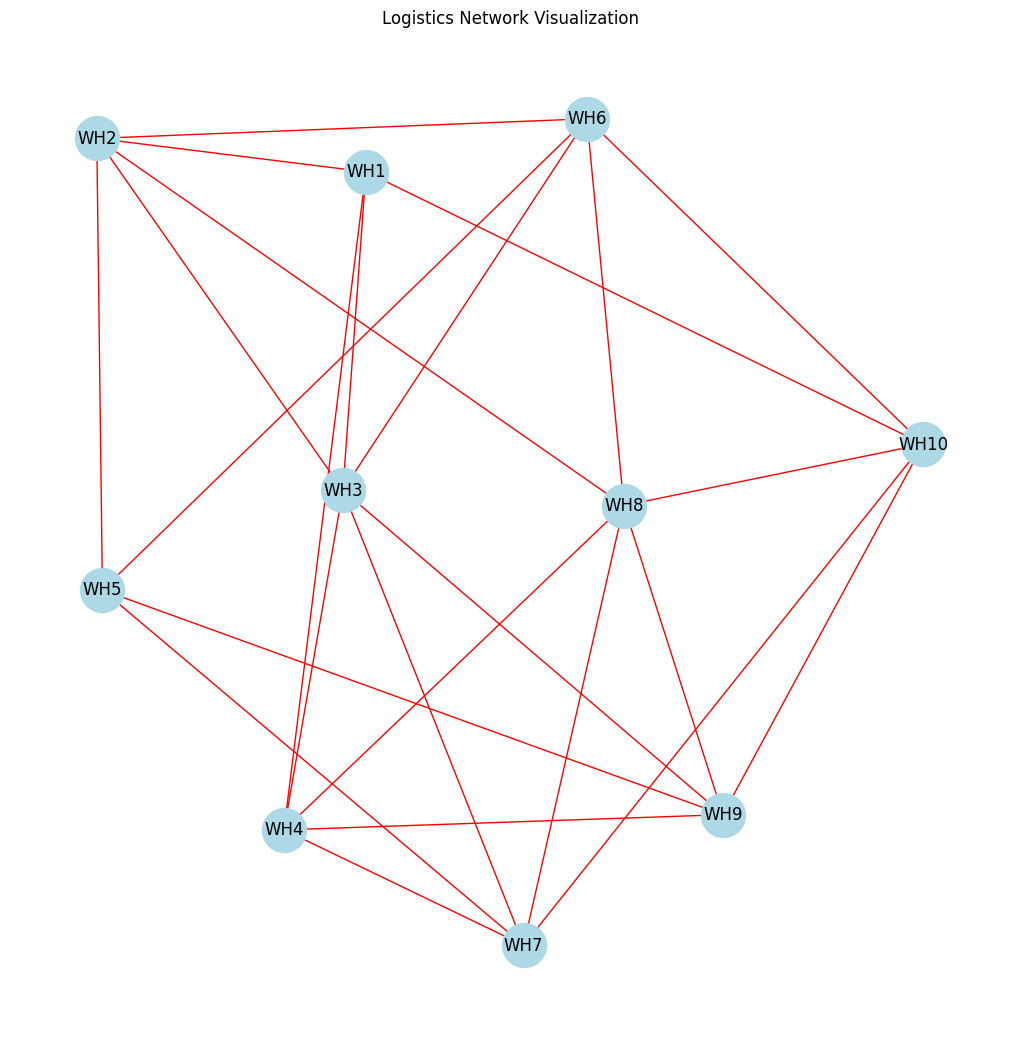

In [14]:
#problem 8
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
for src in adj_list:
    for dest in adj_list[src]:
        G.add_edge(src,dest)

plt.figure(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_color="lightblue",
        node_size=1000, edge_color="red")
plt.title("Logistics Network Visualization")
plt.show()


In [43]:
def visualize_dfs_tree(dfs_edges, start_node):
    G = nx.DiGraph()   # directed to show traversal direction
    G.add_edges_from(dfs_edges)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(9, 7))

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color="lightgreen",
        node_size=2000,
        edge_color="red",
        arrows=True,
        font_weight="bold"
    )

    plt.title("DFS Traversal Path (DFS Tree)")
    plt.show()


In [15]:
#simulate route failure
# remove WH1 <-> WH10
adj_list["WH1"].remove("WH10")
adj_list["WH10"].remove("WH1")


In [17]:
visited = set()
print("DFS after route failure:")
dfsRecursive(adj_list, "WH1", visited)


DFS after route failure:
WH1 WH2 WH5 WH6 WH3 WH7 WH4 WH8 WH9 WH10 

In [18]:
def has_cycle(graph):
    visited = set()

    def dfs(node, parent):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs(neighbor, node):
                    return True
            elif neighbor != parent:
                return True
        return False

    for node in graph:
        if node not in visited:
            if dfs(node, None):
                return True
    return False


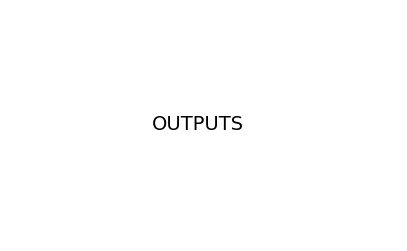

In [22]:
plt.figure(figsize=(5, 3))


plt.figtext(0.5, 0.5, 'OUTPUTS',
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=18)
plt.axis('off')
plt.show()


In [23]:
#P1:
print("Adjacency List of Logistics Network:\n")
for hub in adj_list:
    print(hub, "->", adj_list[hub])


Adjacency List of Logistics Network:

WH1 -> ['WH2', 'WH3', 'WH4']
WH2 -> ['WH1', 'WH5', 'WH6', 'WH3', 'WH8']
WH3 -> ['WH1', 'WH6', 'WH7', 'WH2', 'WH4', 'WH9']
WH4 -> ['WH1', 'WH7', 'WH8', 'WH3', 'WH9']
WH5 -> ['WH2', 'WH6', 'WH9', 'WH7']
WH6 -> ['WH2', 'WH3', 'WH5', 'WH10', 'WH8']
WH7 -> ['WH3', 'WH4', 'WH8', 'WH10', 'WH5']
WH8 -> ['WH4', 'WH7', 'WH9', 'WH10', 'WH6', 'WH2']
WH9 -> ['WH5', 'WH8', 'WH10', 'WH4', 'WH3']
WH10 -> ['WH6', 'WH7', 'WH8', 'WH9']


In [24]:
from ast import While
#P2:
start='WH2'

print("recursive dfs traversal starting from: ", start)

visited=set()

dfsRecursive(adj_list,start,visited)

recursive dfs traversal starting from:  WH2
WH2 WH1 WH3 WH6 WH5 WH9 WH8 WH4 WH7 WH10 

In [40]:
def dfs_with_parent(graph, node, visited, parent):
    visited.add(node)

    for neighbor in graph[node]:
        if neighbor not in visited:
            parent[neighbor] = node   # record DFS edge
            dfs_with_parent(graph, neighbor, visited, parent)


In [41]:
start_hub = "WH1"

visited = set()
parent = {}
parent[start_hub] = None

dfs_with_parent(adj_list, start_hub, visited, parent)

print("DFS Parent Map:")
print(parent)


DFS Parent Map:
{'WH1': None, 'WH2': 'WH1', 'WH5': 'WH2', 'WH6': 'WH5', 'WH3': 'WH6', 'WH7': 'WH3', 'WH4': 'WH7', 'WH8': 'WH4', 'WH9': 'WH8', 'WH10': 'WH9'}


In [42]:
dfs_edges = []

for child in parent:
    if parent[child] is not None:
        dfs_edges.append((parent[child], child))

print("DFS Traversal Edges:")
print(dfs_edges)


DFS Traversal Edges:
[('WH1', 'WH2'), ('WH2', 'WH5'), ('WH5', 'WH6'), ('WH6', 'WH3'), ('WH3', 'WH7'), ('WH7', 'WH4'), ('WH4', 'WH8'), ('WH8', 'WH9'), ('WH9', 'WH10')]


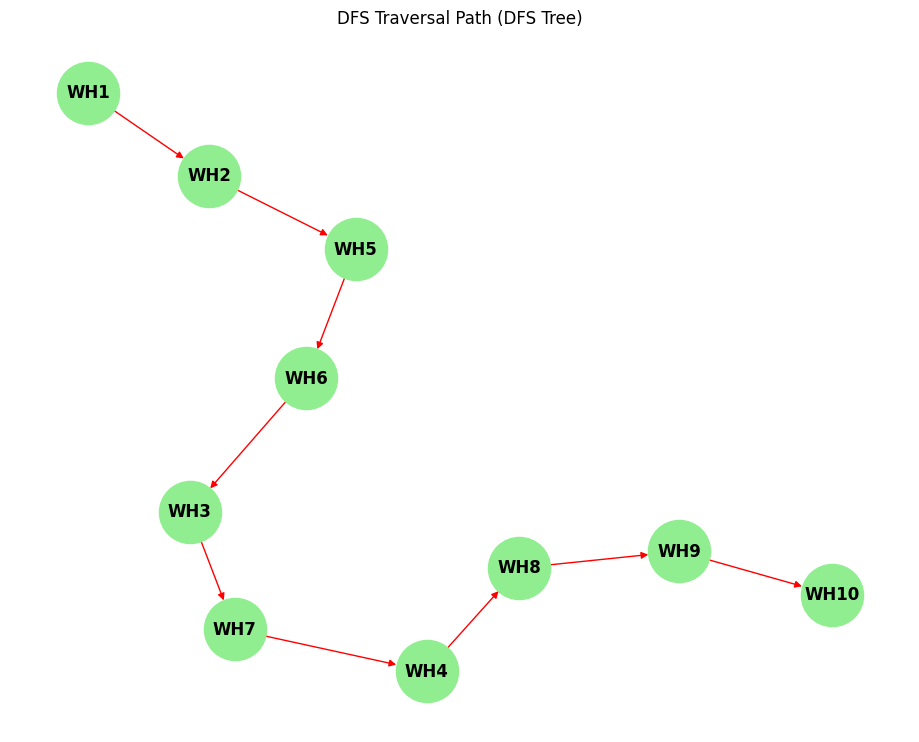

In [44]:
visualize_dfs_tree(dfs_edges, start_hub)




Iterative DFS Traversal starting from WH1
Iterative DFS Traversal:
WH1 WH4 WH9 WH3 WH2 WH8 WH6 WH10 WH7 WH5 

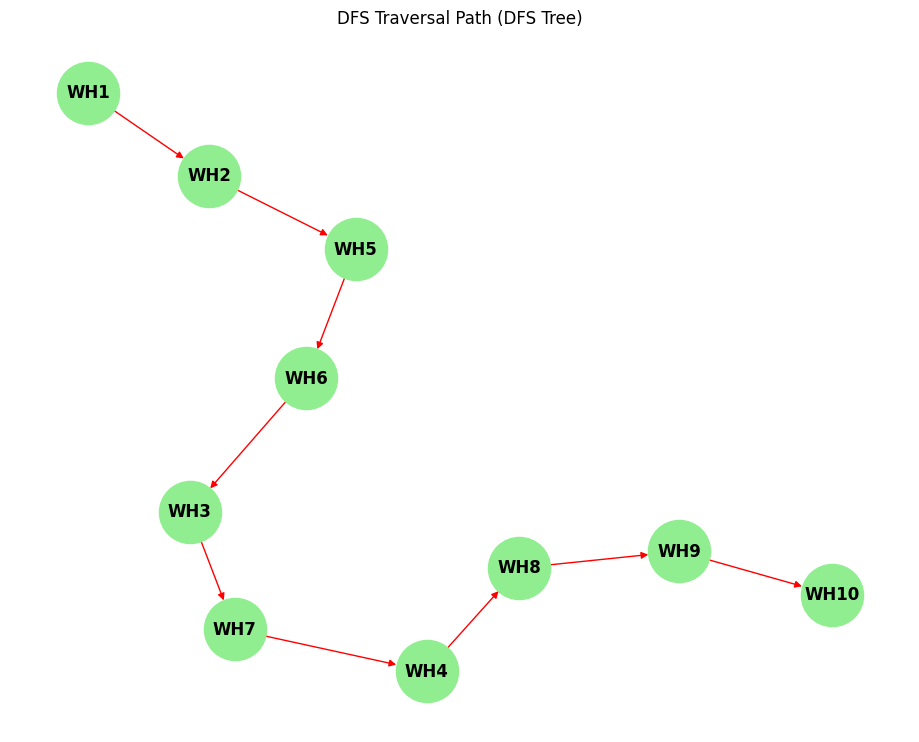

In [46]:
print("\n\nIterative DFS Traversal starting from", start_hub)
dfsIterative(adj_list, start_hub)
visualize_dfs_tree(dfs_edges,start_hub)


In [48]:
src = "WH1"
dest = "WH9"

visited = set()
path = []

if find_route_dfs(adj_list, src, dest, visited, path):
    print(f"Route exists between {src} and {dest}")
    print("Route followed:")
    print(" -> ".join(path))
else:
    print(f"No route exists between {src} and {dest}")


Route exists between WH1 and WH9
Route followed:
WH1 -> WH2 -> WH5 -> WH6 -> WH3 -> WH7 -> WH4 -> WH8 -> WH9


In [49]:
isolated_hubs = []

for hub in adj_list:
    if len(adj_list[hub]) == 0:
        isolated_hubs.append(hub)

print("\nIsolated Warehouses:", isolated_hubs)



Isolated Warehouses: []


In [50]:
components = connected_components(adj_list)

print("\nConnected Components:")
for i, comp in enumerate(components, 1):
    print(f"Component {i}: {comp}")

print("Total Components:", len(components))



Connected Components:
Component 1: ['WH1', 'WH4', 'WH9', 'WH3', 'WH2', 'WH8', 'WH6', 'WH10', 'WH7', 'WH5']
Total Components: 1


In [57]:
print("\nDFS before route failure:")
visited = set()
dfsRecursive(adj_list, start_hub, visited)

# Remove a route
adj_list["WH8"].remove("WH10")
adj_list["WH10"].remove("WH8")

print("\n\nDFS after route failure (WH8 <-> WH10 removed):")
visited = set()
dfsRecursive(adj_list, start_hub, visited)



DFS before route failure:
WH1 WH2 WH5 WH6 WH3 WH7 WH4 WH8 WH9 WH10 

ValueError: list.remove(x): x not in list

In [58]:
if has_cycle(adj_list):
    print("\n\nCycle detected in logistics network")
else:
    print("\n\nNo cycle detected in logistics network")




Cycle detected in logistics network
